In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten #input,lamda,dense,flatten are the libraries
from keras.models import Model #this is model library i.e.,our trained model
from keras.applications.vgg16 import VGG16 #THis actual tranfer learning vgg16 model we need to to import that for use
from keras.applications.vgg16 import preprocess_input# preproccess the data which is already trained for that this library used
from keras.preprocessing import image # This is image library in python for visualization
from keras.preprocessing.image import ImageDataGenerator # this is actual data agumentation ,in which we change background, rotate like do more more of ourimage
from keras.models import Sequential #this is deeplearning network in which we add first and last layers
import numpy as np # it is used for using array
from glob import glob
import matplotlib.pyplot as plt # For graph

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224] # This is image size of pomegranate fruit

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Pomegranate /Train' # This is training andvalidation path 
valid_path = '/content/drive/MyDrive/Colab Notebooks/Pomegranate /Valid'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights, vgg16 transfer learning model already trained only train first and last layer,so remove from it.
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Pomegranate /Train'

In [ ]:
  # useful for getting number of classes
folders = glob(path) #how many classes are there of pomegranate

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(units=4, activation='softmax')(x) #UNits means disease,count of how many disease

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction) 

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,        # This is for training image
                                   horizontal_flip = True) #This is data agumentation,which where we do rescale,zoom,rotate of image 

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') # Till here

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224), # This is for testig image
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''


Found 1201 images belonging to 4 classes.
Found 443 images belonging to 4 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,#for 100 iteration we run model
  #steps_per_epoch=len(training_set),#no of steps of training images
  #validation_steps=len(test_set),#No. of steps of testing images
  #callbacks=callbacks_list # Which iterartion having maximum this will saved into ur directory

)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
38/38 [==============================] - 501s 12s/step - loss: 1.6387 - accuracy: 0.4513 - val_loss: 1.0165 - val_accuracy: 0.3905
Epoch 2/20
38/38 [==============================] - 43s 1s/step - loss: 1.0928 - accuracy: 0.5321 - val_loss: 0.7016 - val_accuracy: 0.8352
Epoch 3/20
38/38 [==============================] - 43s 1s/step - loss: 0.5356 - accuracy: 0.8010 - val_loss: 0.5156 - val_accuracy: 0.7810
Epoch 4/20
38/38 [==============================] - 42s 1s/step - loss: 0.4248 - accuracy: 0.8251 - val_loss: 0.3252 - val_accuracy: 0.8239
Epoch 5/20
38/38 [==============================] - 42s 1s/step - loss: 0.3471 - accuracy: 0.8351 - val_loss: 0.5332 - val_accuracy: 0.7201
Epoch 6/20
38/38 [==============================] - 42s 1s/step - loss: 0.3447 - accuracy: 0.8659 - val_loss: 0.2328 - val_accuracy: 0.9052
Epoch 7/20
38/38 [==============================] - 42s 1s/step - loss: 0.3118 - accuracy: 0.8601 - val_loss: 0.2743 - val_accuracy: 0.9255
Epoch 8/20
38/38 [

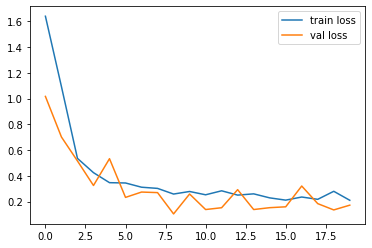

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss') #graph of loss of both training and testing 

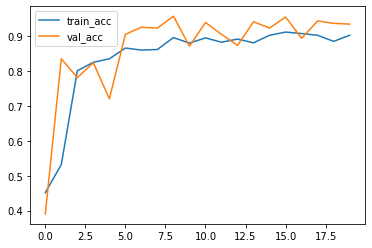

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc') #Graph of accuracy of both training and testing 

In [ ]:
max(r.history['accuracy']) # Maximum accuracy of training

0.911740243434906

In [ ]:
max(r.history['val_accuracy']) # Maximum accuracy of testing

0.957110583782196

In [ ]:

from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/model/trainedmodel.h5')

In [ ]:

import numpy as np
import os # this are simple library of python google it.

from keras.preprocessing.image import load_img # This library for load image which testing disease of pomegranate fruits.
from keras.preprocessing.image import img_to_array # convert image to 3 dimetional array
from keras.models import load_model # load alreay trained model from ur computer





fruit="/content/drive/MyDrive/Colab Notebooks/Pomegranate /Test/Fruit Rot/FR_0401.jpg" # Path of image which we detect the disease
test_image = load_img(fruit, target_size = (224, 224)) # load image from directory

   
test_image = img_to_array(test_image)/255 # convert image to np array and normalize
test_image = np.expand_dims(test_image, axis = 0) # change dimention 3D to 4D
   
result = model.predict(test_image).round(3) # predict diseased or not

pred = np.argmax(result) # Which disease have maximum score I.e., that image have this disease
print(pred)

1


In [ ]:
#pred  # That image 

In [ ]:
training_set.class_indices # these are classe and its no.

{'Bacterial Blight': 0, 'FruitRot': 1, 'Healthy ': 2, 'Scab': 3}